In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Modelo de Regressão Linear Simples

O modelo de regressão linear simples é dado por:

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$$

Sendo $x^{(i)}$ o valor da característica do exemplo \( i \).

### Gradiente Descendente Mini-Batch

O Gradiente Mini-Batch utiliza as mesmas equações matemáticas do Gradiente Batch; a diferença está na quantidade de exemplos usados por iteração, que agora corresponde a um subconjunto do conjunto de dados. Assim:

- A função de custo utilizada é:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

- Os gradientes para $\theta$:

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

- Atualização dos parâmetros é:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$ 

In [2]:
##Função de custo
def calcular_custo(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma = 0
    
    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma += erro**2

    return (1/(2*samples)) * sigma

In [3]:
##Calcular o gradiente
def calcular_gradiente(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0

    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma_0 += erro
        sigma_1 += erro * features[i]
        
    grad_theta_0 = (1/samples) * sigma_0
    grad_theta_1 = (1/samples) * sigma_1

    return [grad_theta_0, grad_theta_1]

In [4]:
def atualizar_theta(theta_values, features, targets, samples, learning_rate, num_iters):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0
    armazenar_custo = []

    for i in range(num_iters):
        armazenar_custo.append(calcular_custo([theta_0, theta_1], features, targets, samples))
        grad = calcular_gradiente([theta_0, theta_1], features, targets, samples)
        theta_0 = theta_0 - learning_rate * grad[0]
        theta_1 = theta_1 - learning_rate * grad[1]

    return [theta_0, theta_1], armazenar_custo

O que diferencia o Gradiente Mini-Batch do Gradiente Batch é a forma como os dados são utilizados: no Mini-Batch, o conjunto de dados é dividido em pequenos grupos (mini-batches), e o gradiente é calculado separadamente para cada um desses subgrupos.

Por exemplo, se tivermos um conjunto de dados $x = [1, 2, 3, 4, 5, 6, 7, 8, 9]$ e $y = [10, 11, 12, 13, 14, 15, 16, 17, 18]$, e definirmos o tamanho de cada mini-batch como 3 elementos, os dados serão divididos nos seguintes subgrupos (mini-batches):

- $X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]$
- $Y = [[10, 11, 12], [13, 14, 15], [16, 17, 18]]$

A função abaixo, implementa esta funcionalidade:

In [5]:
def split_batch(features, targets, num_batches):
    x_split = []
    y_split = []
    n = 0

    for i in range(len(features)):
        vazio_x = []
        vazio_y = []
        for j in range(num_batches):
            if n <= len(features) - 1:
                vazio_x.append(features[n])
                vazio_y.append(targets[n])
                n += 1
                
        if len(vazio_x) != 0:
            x_split.append(vazio_x)
            y_split.append(vazio_y)
        
    return x_split, y_split

Executando a função que calcula o Mini-Batch

In [6]:
def executar_minibatch(theta_values, features, targets, learning_rate):
    theta_vector = theta_values
    armazenar_custo = []
    armazenar_theta_0 = []
    armazenar_theta_1 = []
    for i in range(int(len(X))):
        armazenar_theta_0.append(theta_vector[0])
        armazenar_theta_1.append(theta_vector[1])
        samples = len(X[i])
        theta_vector, custo = atualizar_theta(theta_vector, X[i], Y[i], samples, learning_rate, 1)
        armazenar_custo.append(custo[0])

    return theta_vector, armazenar_custo, [armazenar_theta_0, armazenar_theta_1]

---
## Aplicação do gradiente Mini-Batch

No exemplo abaixo, é utilizado um conjunto de dados fictício, onde a primeira coluna descreve o tamanho das casas e a segunda, o valor delas.

In [7]:
##Carregar e processar os dados
data = np.loadtxt("Data/data1.txt", delimiter = ",")
x = data[:, 0]
y = data[:, 1]

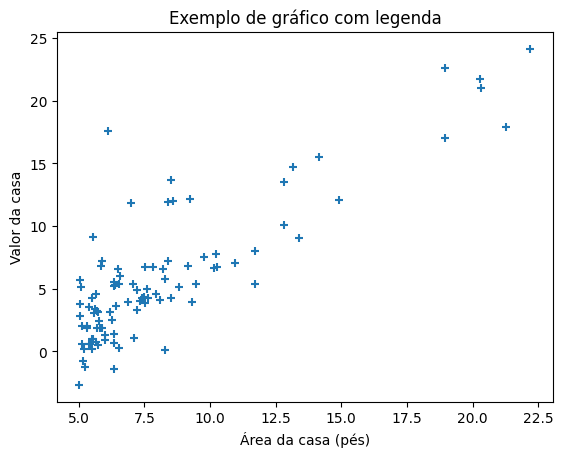

In [8]:
##Disposição dos dados no plano
plt.scatter(x, y, marker = "+")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

In [9]:
##Dividir o conjunto de dados em batchs, onde cada um contém n elementos
n = 20
X, Y = split_batch(x, y, n)

Aqui é realizada a inicialização dos parâmetros. Note que o vetor $\theta$ é iniciado com $\theta_0 = 0$ e $\theta_1 = 0$,  pois ainda não conhecemos seus valores ideais. Por padrão, ambos começam com esse valor.

In [10]:
##Incialização dos parâmetros
theta = [0, 0]
alpha = 0.01

In [11]:
theta_atualizado, custo_atualizado, hist_theta = executar_minibatch(theta, X, Y, alpha)

In [12]:
##O valor atualizado de theta:
theta_atualizado

[0.028447077491389427, 0.6142187647493824]

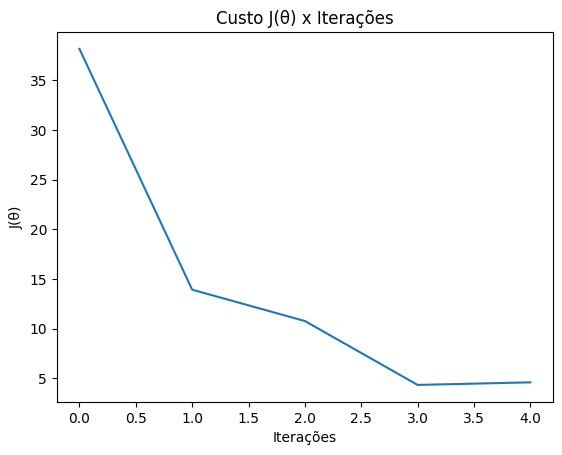

In [13]:
##Visualição do custo
plt.plot(custo_atualizado)
plt.title('Custo J(θ) x Iterações')
plt.xlabel('Iterações')
plt.ylabel('J(θ)')
plt.show()

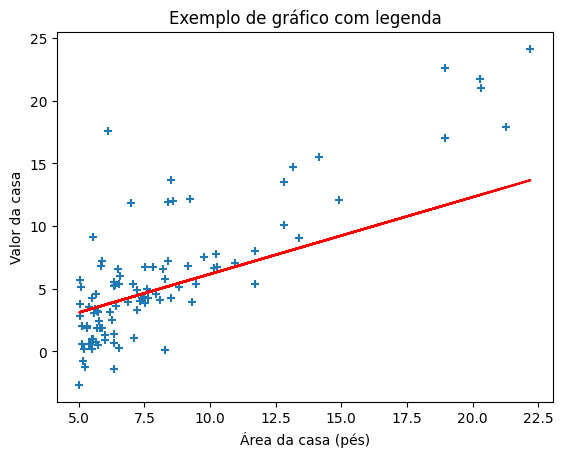

In [14]:
##Visualização da reta, com base nos valores de theta gerados
y_previstos = theta_atualizado[0] + theta_atualizado[1] * x

plt.scatter(x, y, marker = "+")
plt.plot(x, y_previstos, color = "red")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

### Análise do Custo em Relação aos Parâmetros

Nesta etapa, analisamos como os valores de $\theta$ evoluem ao longo das iterações, observando o comportamento do gradiente e sua trajetória até a convergência.

Inicialmente, calcula-se o custo para cada combinação de $\theta_0$ e $\theta_1$, a fim de observar a forma da superfície da função de custo.

In [15]:
##Cálculo e formatação das variáveis para plot da superfície
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values =  np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta_0_values, theta_1_values)
all_custo = []

for i in range(100):
    for j in range(100):
        all_custo.append(calcular_custo([theta_0_values[i], theta_1_values[j]], x, y, int(len(x))))

J_vals = np.array(all_custo).reshape(100, 100)

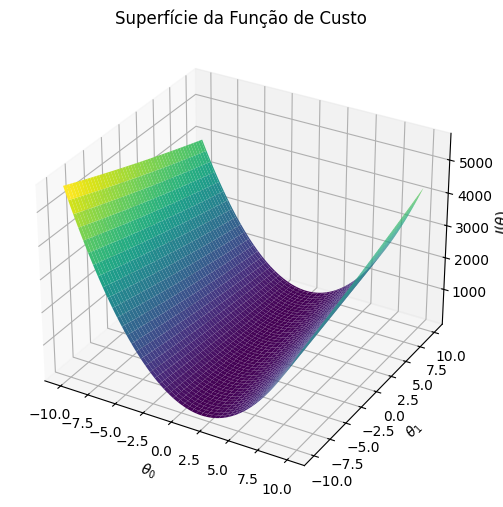

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

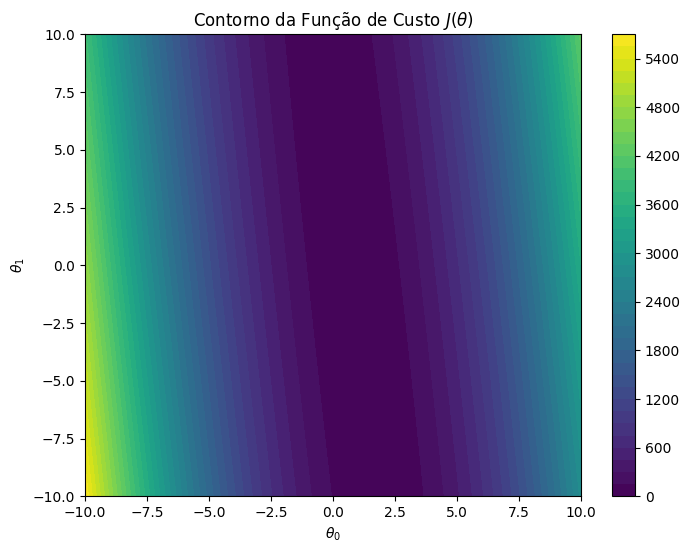

In [17]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

Agora analisando a trajetória do gradiente em cima da superfície do custo:

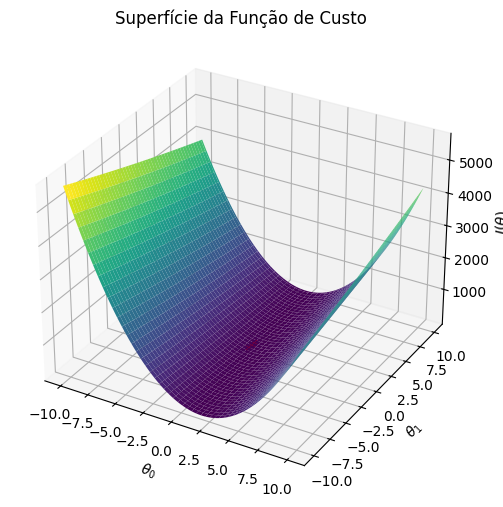

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(hist_theta[0], hist_theta[1], custo_atualizado, color='red', marker='o', markersize=3, linewidth=2, label='Trajetória')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

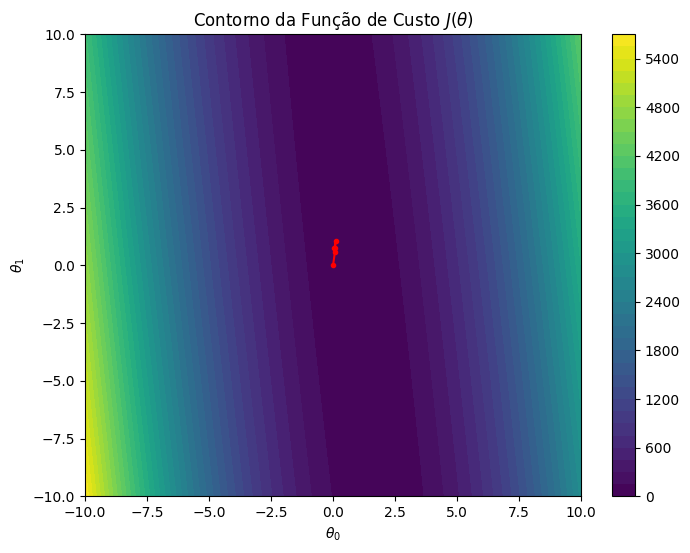

In [19]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(hist_theta[0], hist_theta[1], color='red', marker='o', markersize=3, linewidth=1.5, label='Trajetória do Gradiente')
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()